<a href="https://colab.research.google.com/github/nadah09/MachineAuditionHighSchool/blob/main/pitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Frequency and Pitch

In this notebook, we pivot to the frequency property of a signal. The frequency of a signal impacts the pitch that we hear played. Lower frequencies correspond to lower pitched notes, and same for higher frequencies. Let's begin as before by installing our libraries.

In [65]:
!wget "https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz"
!tar -xvf lib6003-0.0.4.tar.gz
!cd lib6003-0.0.4 && /usr/local/bin/python setup.py install
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio

--2021-06-01 02:07:30--  https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz
Resolving sigproc.mit.edu (sigproc.mit.edu)... 18.25.4.177
Connecting to sigproc.mit.edu (sigproc.mit.edu)|18.25.4.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21264 (21K) [application/x-tar]
Saving to: ‘lib6003-0.0.4.tar.gz.4’

lib6003-0.0.4.tar.g 100%[===================>]  20.77K  --.-KB/s    in 0s      

2021-06-01 02:07:31 (273 MB/s) - ‘lib6003-0.0.4.tar.gz.4’ saved [21264/21264]

lib6003-0.0.4/
lib6003-0.0.4/LICENSE
lib6003-0.0.4/MANIFEST.in
lib6003-0.0.4/PKG-INFO
lib6003-0.0.4/README
lib6003-0.0.4/lib6003/
lib6003-0.0.4/lib6003/__init__.py
lib6003-0.0.4/lib6003/audio.py
lib6003-0.0.4/lib6003/fft.py
lib6003-0.0.4/lib6003/image.py
lib6003-0.0.4/lib6003/wavfile.py
lib6003-0.0.4/lib6003.egg-info/
lib6003-0.0.4/lib6003.egg-info/PKG-INFO
lib6003-0.0.4/lib6003.egg-info/SOURCES.txt
lib6003-0.0.4/lib6003.egg-info/dependency_links.txt
lib6003-0.0.4/lib6003.egg-i

Once the above block has run, hit Runtime -> Restart runtime and the run the block below to import our libraries.

In [66]:
from lib6003.audio import wav_read, wav_write, wav_play
from math import sin, cos, pi, e, log
import pyaudio
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import scipy
import scipy.signal
import numpy as np


In this activity we will focus on how frequency affects the sound and shape of a waveform. We start with a simple tune as shown in the next box. We also set the sampling rate, fs, to 22050 samples/second. Run the following block.

In [67]:
fs = 22050
tune = [(440.0, 0.5), (880.0, 0.5)]

We also include the same helper functions you've seen before -- make_tune, and adjust_volume.

In [68]:
def make_tune(tune):
    """
    Constructs wav file samples from frequency, duration list of notes and sampling rate
    """
    period = 0
    samples = []
    for freq, duration in tune:
        period += duration
        f = freq
        seconds = duration
        Omega = 2*pi*f/fs
        for n in range(int(seconds*fs)): # TODO: how many samples should we generate?
            samples.append(sin(Omega*n))
    return samples
  
def adjust_volume(samples, volume = 1):
  """
  Reconstructs wav file given a list of samples from make_tune and a percentage change in volume (1 = same volume, 0.5 = half volume, 2 = double volume)
  """
  return [i*volume for i in samples]

Now we will create and plot the tune given. Run the following code:

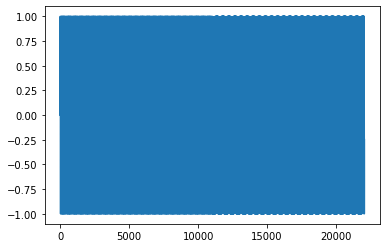

In [69]:
samples = make_tune(tune)
wav_write(samples,fs, "freq.wav")
plt.plot(samples)
plt.show()

This plot doesn't seem super helpful when we try to view the entire signal as a whole! Instead, we introduce a Fourier Transform, a way of viewing the frequencies present in our wave. The code for this is shown below. Run the block below.

In [81]:
def plotFFT(samples):
  """
  Plots magnitude response of signal
  """
  w, H = scipy.signal.freqz(samples)
  w = [i*fs/(pi*2) for i in w]
  plt.stem(w, np.abs(H))
  plt.xlim(0, 1000)
  plt.title("Frequencies")
  plt.xlabel("Radian Frequency (Hz)")
  plt.ylabel("Amplitude")
  plt.show()

With this function, we can now try to view the Fourier Transform of the tune, which will show us the frequencies present, and how intense they each are in the tune. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


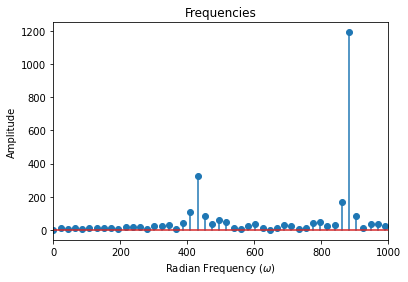

In [71]:
plotFFT(samples)

We can make much more sense of our signal with this plot! Here we see two clear frequencies -- 440, and 880, as we saw in our tune list. (Note: Since we are working with finite signals, we do not get exactly two values in frequency. We should focus on the clear peaks in these plots as our frequency content.)

However, there is something important to note here. Let's say we swapped the order of our tune and ran the same code:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


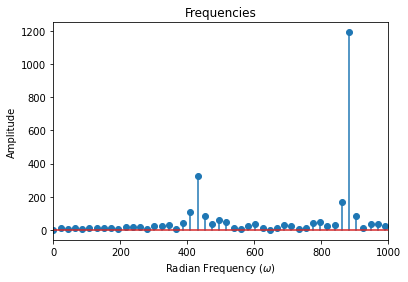

In [72]:
tune = [(880.0, 0.5), (440.0, 0.5)]
samples = make_tune(tune)
plotFFT(samples)

We get almost the exact same plot! This is due to the fact that this frequency representation is time-independent, meaning that the order of our notes does not matter. If we want to see the time information for our signal, we need to use a spectrogram, which plots frequencies over time. Below is code for plotting a spectrogram:

In [77]:
#SPECTROGRAM CODE: DO NOT MODIFY
window_size = 2**10
step_size = 2**10

def fft(x):
    if len(x) == 1:
        return x
    N = len(x)
    x_even = x[0::2]
    x_odd = x[1::2]
    X_even = fft(x_even)
    X_odd = fft(x_odd)

    return [1/2*(X_even[i]+e**(-2*j*pi*i/N)*X_odd[i]) for i in range(N//2)] + [1/2*(X_even[i]-e**(-2*j*pi*i/N)*X_odd[i]) for i in range(N//2)]
  

def hann(x):
    out = []
    for i in range(x):
        temp = cos(2*pi*i/(x-1))
        out.append(1/2*(1-temp))
    return out

def transpose(x):
    return [[i[j] for i in x] for j in range(len(x[0]))]

def k_to_hz(k, window_size, step_size, sample_rate):
    # return the frequency in Hz associated with bin number k in an STFT with
    # the parameters given above.
    return k*sample_rate/window_size


def hz_to_k(freq, window_size, step_size, sample_rate):
    # return the k value associated with the given frequency in Hz, in an STFT
    # with the parameters given above, rounded to the nearest integer.
    return round(window_size*freq/sample_rate)


def timestep_to_seconds(i, window_size, step_size, sample_rate):
    # return the real-world time in seconds associated with the center of the
    # ith window in an STFT using the parameters given above, rounded to the
    # nearest .01 seconds.
    return round((i*step_size+window_size/2)/sample_rate, 2)

def stft(x, window_size, step_size, sample_rate):
    nsteps = (len(x)-window_size)//step_size + 1
    out = []
    hann_ = hann(window_size)
    for i in range(nsteps):
        samples = x[i*step_size:i*step_size+window_size]
        samples = [samples[i]*hann_[i] for i in range(window_size)]
        fft_ = fft(x[i*step_size:i*step_size+window_size])
        out.append(fft_)

    return out

def spectrogram(X, window_size, step_size, sample_rate):
    return [[abs(i)**2 for i in j] for j in transpose(X)]


def plot_spectrogram(sgram, window_size, step_size, sample_rate):
    # the code below will uses matplotlib to display a spectrogram.  it uses
    # your k_to_hz and timestep_to_seconds functions to label the horizontal
    # and vertical axes of the plot.
    # amplitudes are plotted on a log scale, since human perception of loudness
    # is roughly logarithmic.
    width = len(sgram[0])
    height = len(sgram)//16+1  # only plot values up to N/2

    tmp = [[(float('inf') if 0 >= x else x) for x in row] for row in sgram[:height+1]]
    smallest = min(min(row) for row in tmp)
    plt.imshow([[log(smallest if i == 0 else i) for i in j] for j in sgram[:height+1]], aspect=width/height)

    #plt.imshow([[log(i) for i in j] for j in sgram[:height+1]], aspect=width/height)
    plt.axis([0, width-1, 0, height-1])

    ticks = ticker.FuncFormatter(lambda x, pos: '{0:.1f}'.format(timestep_to_seconds(x, window_size, step_size, sample_rate)))
    plt.axes().xaxis.set_major_formatter(ticks)
    ticks = ticker.FuncFormatter(lambda y, pos: '{0:.0f}'.format(k_to_hz(y, window_size, step_size, sample_rate)))
    plt.axes().yaxis.set_major_formatter(ticks)

    plt.xlabel('time [s]')
    plt.ylabel('frequency [Hz]')

    plt.colorbar()
    plt.show()

Here we show the spectrogram for the first tune vs. the second tune.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


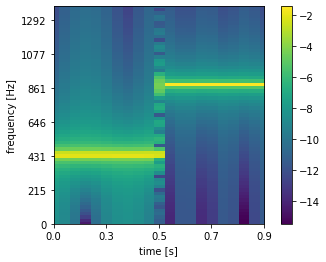

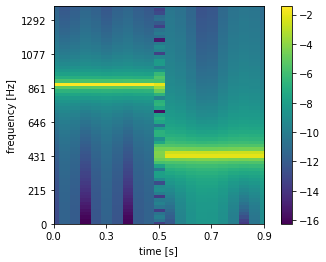

In [79]:
tune1 = [(440.0, 0.5), (880.0, 0.5)]
tune2 = [(880.0, 0.5), (440.0, 0.5)]

samples1 = make_tune(tune1)
samples2 = make_tune(tune2)

stft1 = stft(samples1, window_size, step_size, fs)
stft2 = stft(samples2, window_size, step_size, fs)

specgram1 = spectrogram(stft1, window_size, step_size, fs)
specgram2 = spectrogram(stft2, window_size, step_size, fs)

plot_spectrogram(specgram1, window_size, step_size, fs)
plot_spectrogram(specgram2, window_size, step_size, fs)

Here we see the difference we wanted! Here we can tell that signal 1 shows 440 Hz, and then 880, while signal 2 is flipped. Try running similar code on your own 2-3 note tune!

In [84]:
tune3 = #TODO: Fill in your own tune!

samples3 = make_tune(tune3)
stft3 = stft(samples3, window_size, step_size, fs)

specgram3 = spectrogram(stft3, window_size, step_size, fs)

plot_spectrogram(specgram3, window_size, step_size, fs)

SyntaxError: ignored

What do you notice about your tune? Does it look how you expected?

[ANSWER HERE]

Now we have a few challenges, as before, where we will ask you to create your own waveforms that fit specific properties. Below we give you a Fourier Transform plot:

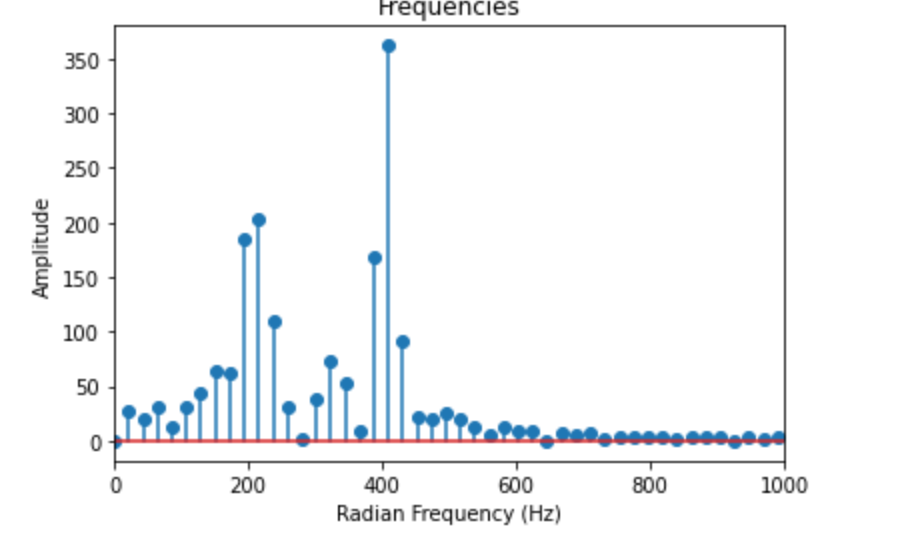

From here, construct your own tune, and plot the fourier transform to ensure that it is possible to create this plot from your chosen waveform.

In [83]:
tune = #TODO: Come up with the correct tune here!
samples = make_tune(tune)
plotFFT(samples)

SyntaxError: ignored

Now, there is one more possible tune here. Come up with another tune that can construct this plot.

In [ ]:
tune2 = #TODO: Come up with the correct tune here!
samples2 = make_tune(tune2)
plotFFT(samples2)

What do you notice here about your two plots? 

[ANSWER HERE]

We now move into reconstruction from spectrograms. Below we see a spectrogram of a two-note sequence.
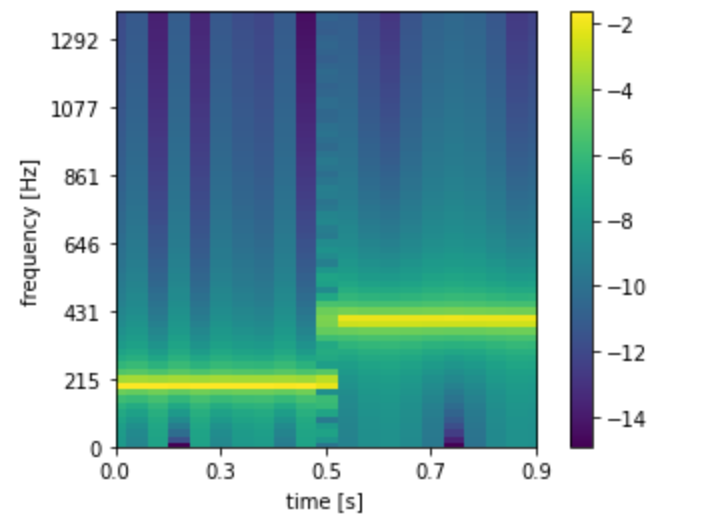

Using this plot, create a third tune (it can be similar to one of your previous ones) to construct this spectrogram.

In [86]:
tune3 = #TODO: Come up with the correct tune here!
samples3 = make_tune(tune3)
stft3 = stft(samples3, window_size, step_size, fs)

specgram3 = spectrogram(stft3, window_size, step_size, fs)

plot_spectrogram(specgram3, window_size, step_size, fs)

SyntaxError: ignored